In [1]:
%matplotlib notebook
%pylab
import pyroomacoustics as pra

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [25]:
room = pra.ShoeBox([4,6], max_order=15, absorption=0.1)
room.add_source([2,1])
room.add_microphone_array(pra.MicrophoneArray(np.array([[3,3.5]]).T, room.fs))
room.image_source_model()
room.compute_rir()

<IPython.core.display.Javascript object>


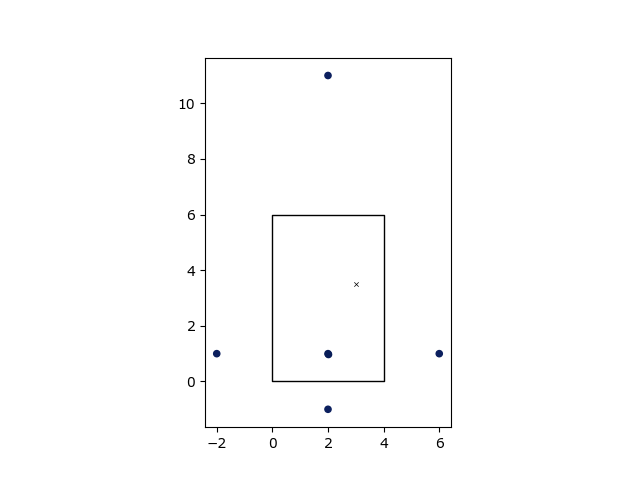

<IPython.core.display.Javascript object>


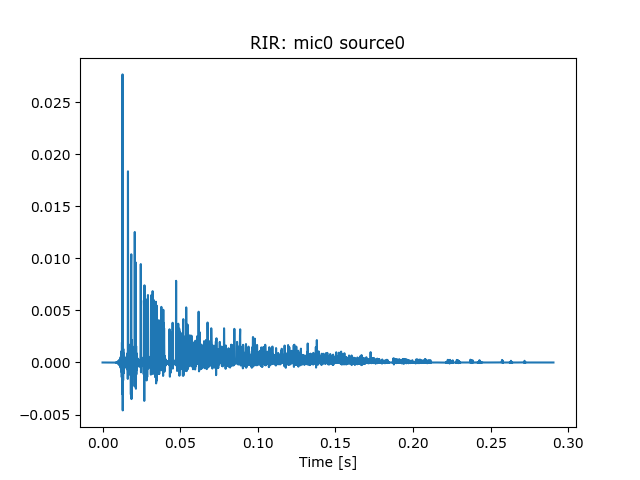

In [26]:
room.plot(img_order=1)
figure()
room.plot_rir()

<IPython.core.display.Javascript object>


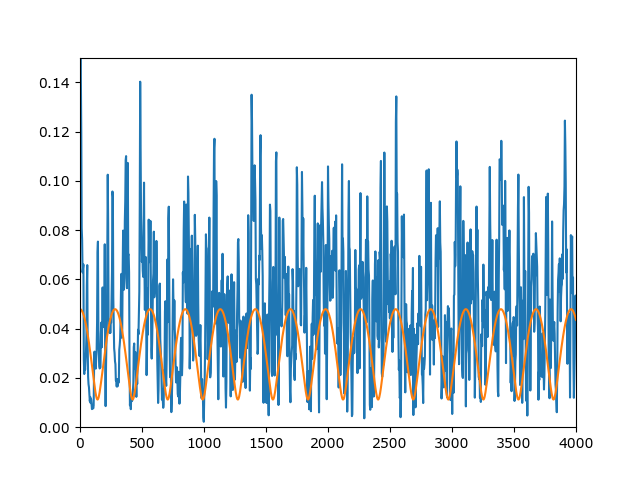

<IPython.core.display.Javascript object>


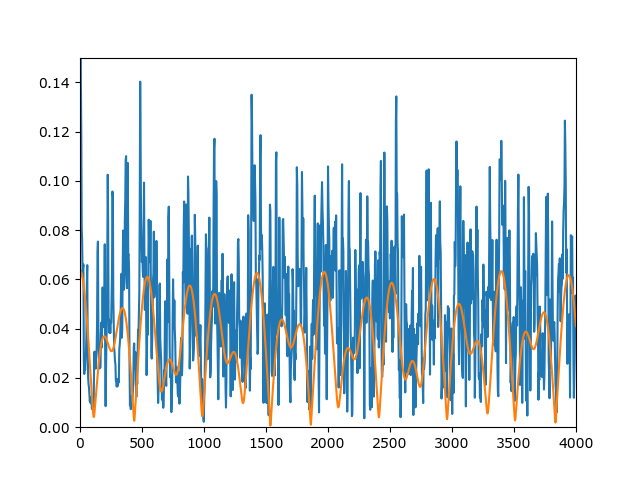

<IPython.core.display.Javascript object>


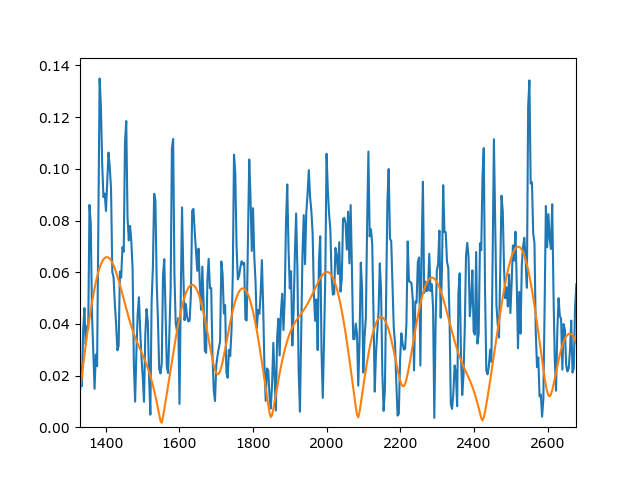

<IPython.core.display.Javascript object>


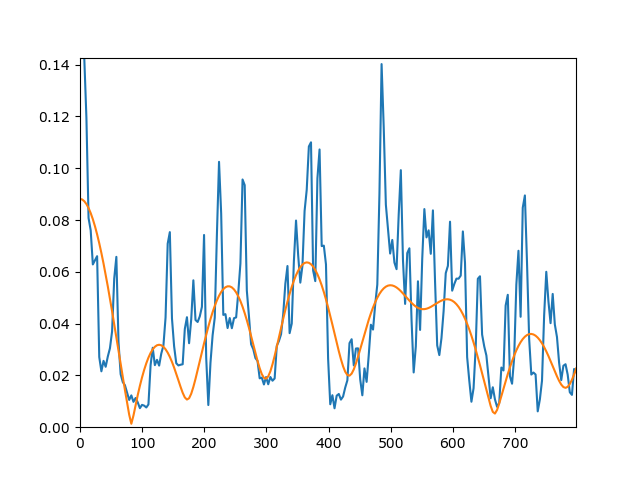

In [27]:
room.sources[0].set_ordering('nearest', ref_point=room.mic_array.R[:,0])
c = pra.constants.get('c')

n_plot = 4
for n in range(2,2+n_plot):
    #subplot(1,n_plot,n-1)
    figure()
    sources = room.sources[0][:n]
    delays = pra.distance(room.mic_array.R, sources.images) / c

    rir = room.rir[0][0]
    rir_fd = np.fft.rfft(rir)
    freq = np.arange(rir_fd.shape[0]) / rir.shape[0] * room.fs

    plot(freq, np.abs(rir_fd))

    ord2 = np.sum(np.exp(-2j * np.pi * delays * freq[:,np.newaxis]) / (c * delays) * sources.damping[np.newaxis,:], axis=1) / (4 * np.pi)

    plot(freq, np.abs(ord2))
    plt.ylim([0., 0.15])
    plt.xlim([0., 4000.])
    savefig('figures/partial_rir_{}.pdf'.format(n))